In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import optuna
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Decide between local or kaggle cloud storage     
if 'kaggle' in os.listdir('/'):
    print('Kaggle environment')
    data_path = '/kaggle/input/playground-series-s4e3'
else:
    data_path = 'kaggle/input/playground-series-s4e3'
    
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))     

kaggle/input/playground-series-s4e3/test.csv
kaggle/input/playground-series-s4e3/train.csv


# Overview

This competition is about multilabel classification problem. 

- Analyses every feature for following attributes: Name, Type (category, int/float, limit/unlimited, Text, ...)
- procent part of missing data
- noise ( stochastic, outlier, rounding errors)
- distribution ( normal, unique, logarithmic)
- check target feature
- visualize the data
- check correleation between the data
- check transformations 

In [43]:
df_train = pd.read_csv(data_path + '/train.csv')
df_test = pd.read_csv(data_path + '/test.csv')
pd.set_option('display.max_columns', None)
df_train.head(20)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,118,1650,1,0,70,0.2761,0.4136,0.4091,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,127,1373,0,1,40,0.8331,0.2744,0.6842,0.0110,0.7143,1.0000,1.0,2.3096,1.1761,1.3222,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,110,1692,0,1,300,0.1491,0.4326,0.9643,0.0142,0.5686,0.7179,1.0,2.7528,1.3802,1.7559,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,140,1360,0,1,40,0.7210,0.4815,0.3333,0.0176,0.8000,0.7500,0.0,2.0043,1.3802,0.7782,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,133,1687,1,0,60,0.8088,0.2000,0.5333,0.0037,0.8333,1.0000,1.0,1.7324,0.6990,1.1761,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [44]:
df_train.isnull().sum() # Check about null values

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [45]:
df_train.duplicated().sum() # Check about duplicates

0

In [46]:
df_train.nunique().values # Number of Unique

array([19219,  1191,  1259,  3345,  3341,  1154,   460,   331,  2595,
         162,    98,    99,     2,     2,    27,  1849,  1748,  1118,
         525,  1102,   900,     4,  1072,   206,   241,  1598,  2046,
         467,     2,     2,     2,     2,     2,     2,     2])

In [47]:
df_train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

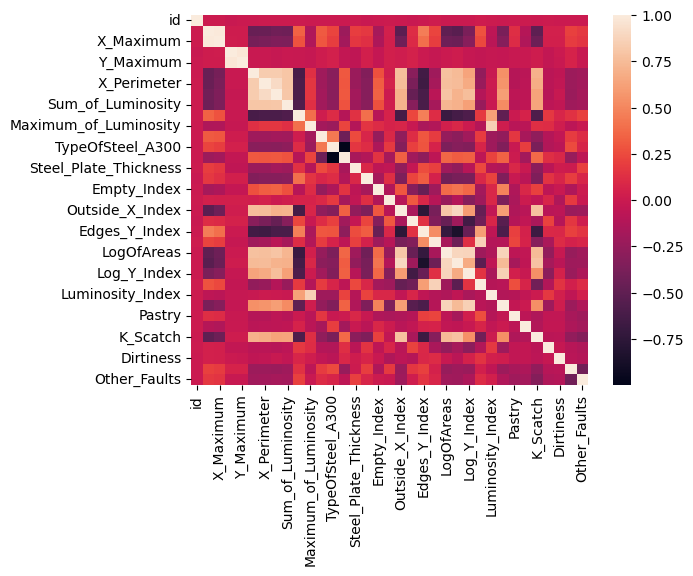

In [48]:
correlation = df_train.corr()
sns.heatmap(correlation)

# General 

# Preprocessing

In [49]:
X_train = df_train.drop(['id', 'Pastry' , 'Z_Scratch' , 'K_Scatch' , 'Stains' , 'Dirtiness' , 'Bumps', 'Other_Faults'], axis=1)
y_train = df_train[['Pastry' , 'Z_Scratch' , 'K_Scatch' , 'Stains' , 'Dirtiness' , 'Bumps', 'Other_Faults']]
X_test = df_test.drop(['id'],axis=1)

# Model RandomForestClassifier

## Easy Approach

In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
# Create DataFrame for predictions
submission_df = pd.DataFrame(y_pred, columns=y_train.columns)

# Add the 'id' column from the test dataset
submission_df['id'] = df_test['id']

# Rearrange the columns to match the sample_submission.csv file
submission_df = submission_df[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Export DataFrame as a CSV file
#submission_df.to_csv('submission.csv', index=False)

## GridSearchCV

In [52]:
rf_classifier = RandomForestClassifier()

# Definiere das Gitter der Hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid-Suche durchführen
grid_search = GridSearchCV(rf_classifier, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Beste Hyperparameter
best_params = grid_search.best_params_
print("Beste Hyperparameter:", best_params)

y_pred = grid_search.predict(X_test)

Beste Hyperparameter: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [53]:
# Create DataFrame for predictions
submission_df = pd.DataFrame(y_pred, columns=y_train.columns)

# Add the 'id' column from the test dataset
submission_df['id'] = df_test['id']

# Rearrange the columns to match the sample_submission.csv file
submission_df = submission_df[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Export DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)

## GridSearchCV + StandardScaler

In [54]:
# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())  # Änderung des Namens des Schritts von 'model' zu 'classifier'
])

# Define the grid of hyperparameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy for RandomForestClassifier
print("\nBest parameters for RandomForestClassifier:", grid_search.best_params_)
print("Best accuracy for RandomForestClassifier:", grid_search.best_score_)

# Use the grid search model to make predictions on X_test
y_pred = grid_search.predict(X_test)


Best parameters for RandomForestClassifier: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best accuracy for RandomForestClassifier: 0.3741093648925314


In [55]:
# Bestes Modell aus der Grid-Suche
best_model = grid_search.best_estimator_

# Vorhersagen auf dem Trainingsdatensatz mithilfe von Cross-Validation machen
y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5)

# Error analysis for RandomForestClassifier based on Cross-Validation
print("\nError analysis for RandomForestClassifier (Cross-Validation):")
print(classification_report(y_train, y_pred_cv))

# Confusion Matrix for RandomForestClassifier based on Cross-Validation
#conf_matrix_cv = confusion_matrix(y_train, y_pred_cv, labels=np.unique(y_train))

# Outputting the Confusion Matrix
#print("\nConfusion Matrix for RandomForestClassifier (Cross-Validation):")
#print(conf_matrix_cv)

# Plotting the Confusion Matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(conf_matrix_cv, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
#plt.title('Confusion Matrix (Random Forest Classifier - Cross-Validation)')
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.show()


Error analysis for RandomForestClassifier (Cross-Validation):
              precision    recall  f1-score   support

           0       0.49      0.02      0.05      1466
           1       0.69      0.32      0.44      1150
           2       0.91      0.87      0.89      3432
           3       0.75      0.69      0.72       568
           4       0.53      0.03      0.06       485
           5       0.59      0.29      0.39      4763
           6       0.52      0.23      0.32      6558

   micro avg       0.69      0.36      0.48     18422
   macro avg       0.64      0.35      0.41     18422
weighted avg       0.63      0.36      0.43     18422
 samples avg       0.35      0.35      0.35     18422



/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Create DataFrame for predictions
submission_df = pd.DataFrame(y_pred, columns=y_train.columns)

# Add the 'id' column from the test dataset
submission_df['id'] = df_test['id']

# Rearrange the columns to match the sample_submission.csv file
submission_df = submission_df[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# XGBOOST

## Easy approach

In [68]:
cl_xgb = xgboost.XGBClassifier()
cl_xgb.fit(X_train, y_train)
y_pred = cl_xgb.predict(X_test)

cv_scores = cross_val_score(cl_xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", cv_scores)

mean_cv_score = cv_scores.mean()
print("Mean cross-validation accuracy:", mean_cv_score)

Cross-validation scores: [0.41701353 0.41831426 0.41831426 0.42299688 0.42050481]
Mean cross-validation accuracy: 0.41942874634828026


In [69]:
# Create DataFrame for predictions
submission_df_1 = pd.DataFrame(y_pred, columns=y_train.columns)

# Add the 'id' column from the test dataset
submission_df_1['id'] = df_test['id']

# Rearrange the columns to match the sample_submission.csv file
submission_df_1 = submission_df_1[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Export DataFrame as a CSV file
submission_df_1.to_csv('submission_xgboost_easy.csv', index=False)

## Advanced Model

In [66]:
# Building the entire pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier())
])

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [800, 900, 1000],
    'classifier__max_depth': [4],
    'classifier__learning_rate': [0.05, 0.1],  # Adding learning rates
    'classifier__subsample': [0.8, 0.9],  # Sampling size for bootstrapping
    'classifier__colsample_bytree': [0.5, 0.6]  # Feature subsampling rate per tree
}

# GridSearchCV for XGBoost, looking for the best hyperparameters
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, n_jobs=-1)

# Training the XGBoost model with cross-validation
xgb_grid_search.fit(X_train, y_train)

# Best parameters and best accuracy for XGBoost
print("\nBest parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best accuracy for XGBoost:", xgb_grid_search.best_score_)

# Cross-validation predictions for XGBoost
xgb_predictions_cv = cross_val_predict(xgb_grid_search.best_estimator_, X_train, y_train, cv=5)


# Outputting the predictions for XGBoost
print("XGBoost predictions (Cross-Validation):", xgb_predictions_cv)

# Error analysis for XGBoost based on Cross-Validation
print("\nError analysis for XGBoost (Cross-Validation):")
print(classification_report(y_train, xgb_predictions_cv))

# Confusion Matrix for XGBoost based on Cross-Validation
#conf_matrix_cv = confusion_matrix(y_train, xgb_predictions_cv)

# Outputting the Confusion Matrix
#print("\nConfusion Matrix for XGBoost (Cross-Validation):")
#print(conf_matrix_cv)

# Plotting the Classification Report
#df_report = pd.DataFrame(classification_report(y_train, xgb_predictions_cv, output_dict=True)).transpose()
#plt.figure(figsize=(10, 6))
#sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
#plt.title('Visual Classification Report (XGBoost - Cross-Validation)')
#plt.xlabel('Metrics')
#plt.ylabel('Classes')
#plt.show()

# Plotting the Confusion Matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_cv, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
#plt.title('Confusion Matrix (XGBoost - Cross-Validation)')
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.show()

prediction_X_test = xgb_grid_search.predict(X_test)


Best parameters for XGBoost: {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'classifier__subsample': 0.8}
Best accuracy for XGBoost: 0.4318123712641036
XGBoost predictions (Cross-Validation): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]

Error analysis for XGBoost (Cross-Validation):
              precision    recall  f1-score   support

           0       0.38      0.13      0.19      1466
           1       0.64      0.48      0.55      1150
           2       0.90      0.89      0.89      3432
           3       0.72      0.73      0.73       568
           4       0.44      0.12      0.19       485
           5       0.54      0.37      0.44      4763
           6       0.51      0.35      0.42      6558

   micro avg       0.63      0.45      0.53     18422
   macro avg       0.59     

/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Create DataFrame for predictions
submission_df = pd.DataFrame(prediction_X_test, columns=y_train.columns)

# Add the 'id' column from the test dataset
submission_df['id'] = df_test['id']

# Rearrange the columns to match the sample_submission.csv file
submission_df = submission_df[['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

# Export DataFrame as a CSV file
submission_df.to_csv('submission_xgboost_advanced.csv', index=False)

In [85]:
# Define the objective function for Optuna
#def objective(trial):
#    params = {
#        'n_estimators': trial.suggest_categorical('n_estimators', [800, 900, 1000]),
#        'max_depth': trial.suggest_categorical('max_depth', [4]),
#        'learning_rate': trial.suggest_categorical('learning_rate', [0.05, 0.1]),
#        'subsample': trial.suggest_categorical('subsample', [0.8, 0.9]),
#        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6])
    }
    
#    model = xgb.XGBClassifier(**params)
#    preds = cross_val_predict(model, X_train, y_train, cv=5)
    
#    accuracy = accuracy_score(y_train, preds)
#    return accuracy

# Perform hyperparameter optimization with Optuna
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)

#best_params = study.best_params
#print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters
#final_model = xgb.XGBClassifier(**best_params)
#final_model.fit(X_train, y_train)

# Predictions for final model
#final_preds = final_model.predict(X_test)

# Output results
#print("Final Model Accuracy:", accuracy_score(y_train, final_preds))
#print("Classification Report:")
#print(classification_report(y, final_preds))

[I 2024-03-27 22:42:39,727] A new study created in memory with name: no-name-e6250f54-1386-4cb2-8970-1bae2cbd3f83
[I 2024-03-27 22:43:55,594] Trial 0 finished with value: 0.4286383266559134 and parameters: {'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.4286383266559134.
[I 2024-03-27 22:44:45,733] Trial 1 finished with value: 0.4300431864300952 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 1 with value: 0.4300431864300952.
[I 2024-03-27 22:45:58,975] Trial 2 finished with value: 0.43160414173474165 and parameters: {'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 2 with value: 0.43160414173474165.
[I 2024-03-27 22:46:44,567] Trial 3 finished with value: 0.4282220719080077 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0

KeyboardInterrupt: 